# Downloading Dataset

In [2]:
import opendatasets as od
# {"username":"dbdmobile","key":"58934b929f40775e128539b248daa2ec"}
od.download("https://www.kaggle.com/datasets/mayank1897/condition-monitoring-of-hydraulic-systems")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  dbdmobile


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/mayank1897/condition-monitoring-of-hydraulic-systems


100%|██████████████████████████████████████████████████████████████████████████████| 91.1M/91.1M [00:00<00:00, 400MB/s]


# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# Constructing Dataset

#### Pressure Sensor Data

In [5]:
temp=[]
lis1 = ["PS1","PS2","PS3","PS4","PS5","PS6"]
for i in lis1:
    dataPS = np.genfromtxt('condition-monitoring-of-hydraulic-systems/' + i + '.txt')
    temp.append(dataPS)
temp

[array([[151.47, 151.45, 151.52, ..., 151.1 , 151.21, 151.19],
        [151.11, 151.12, 151.16, ..., 150.79, 150.8 , 150.86],
        [150.81, 150.79, 150.84, ..., 150.43, 150.54, 150.62],
        ...,
        [151.73, 151.78, 151.84, ..., 151.73, 151.73, 151.83],
        [151.77, 151.77, 151.75, ..., 151.68, 151.71, 151.78],
        [151.83, 151.78, 151.77, ..., 151.73, 151.71, 151.7 ]]),
 array([[125.5 , 125.39, 125.4 , ..., 125.11, 125.14, 125.1 ],
        [125.06, 125.08, 125.09, ..., 125.13, 125.09, 125.04],
        [125.13, 125.27, 125.23, ..., 124.73, 124.77, 124.88],
        ...,
        [125.41, 125.49, 125.63, ..., 125.84, 125.84, 125.94],
        [125.91, 125.73, 125.59, ..., 125.73, 125.86, 125.91],
        [125.88, 125.86, 125.84, ..., 125.77, 125.66, 125.77]]),
 array([[2.305, 2.305, 2.336, ..., 2.25 , 2.25 , 2.211],
        [2.281, 2.32 , 2.305, ..., 2.211, 2.195, 2.219],
        [2.227, 2.187, 2.156, ..., 2.305, 2.32 , 2.266],
        ...,
        [2.375, 2.437, 2.359, 

In [6]:
# unpacking data from temp
ps1,ps2,ps3,ps4,ps5,ps6=temp

ps1_arr=ps1.mean(axis=1)
ps2_arr=ps2.mean(axis=1)
ps3_arr=ps3.mean(axis=1)
ps4_arr=ps4.mean(axis=1)
ps5_arr=ps5.mean(axis=1)
ps6_arr=ps6.mean(axis=1)

In [7]:
# create a dictionary
data_PS={'PS1':ps1_arr,'PS2':ps2_arr,'PS3':ps3_arr,'PS4':ps4_arr,'PS5':ps5_arr,'PS6':ps6_arr}
df1=pd.DataFrame(data_PS)

# Round values to 2 decimal places
df1['PS1'] = df1['PS1'].round(2)
df1['PS2'] = df1['PS2'].round(2)
df1['PS3'] = df1['PS3'].round(2)
df1['PS4'] = df1['PS4'].round(2)
df1['PS5'] = df1['PS5'].round(2)
df1['PS6'] = df1['PS6'].round(2)
df1.head()

,PS1,PS2,PS3,PS4,PS5,PS6
0,160.67,109.47,1.99,0.0,9.84,9.73
1,160.60,109.35,1.98,0.0,9.64,9.53
2,160.35,109.16,1.97,0.0,9.53,9.43
3,160.19,109.06,1.95,0.0,9.44,9.34
4,160.00,108.93,1.92,0.0,9.36,9.26


#### Motor power Sensor Data

In [8]:
# Extract data from the text file
eps1 = np.genfromtxt('condition-monitoring-of-hydraulic-systems/EPS1.txt')
eps1_arr = eps1.mean(axis=1)

In [9]:
data_PS={'EPS1':eps1_arr}
df2=pd.DataFrame(data_PS)

# Round values to 2 decimal places
df2['EPS1'] = df2['EPS1'].round(2)
df2.head()

,EPS1
0,2538.93
1,2531.50
2,2519.93
3,2511.54
4,2503.45


#### Volume flow Data

In [10]:
temp2=[]
lis2 = ["FS1","FS2"]
for i in lis2:
    dataPS = np.genfromtxt('condition-monitoring-of-hydraulic-systems/' + i + '.txt')
    temp2.append(dataPS)
temp2

[array([[8.99 , 0.77 , 0.641, ..., 7.876, 7.738, 8.036],
        [8.919, 0.815, 0.709, ..., 7.969, 7.963, 7.89 ],
        [9.179, 0.683, 0.528, ..., 7.873, 7.898, 7.952],
        ...,
        [8.17 , 0.686, 0.583, ..., 7.982, 7.859, 7.685],
        [8.496, 0.543, 0.366, ..., 7.758, 7.892, 7.793],
        [8.373, 0.776, 0.667, ..., 7.783, 7.943, 7.774]]),
 array([[10.179, 10.174, 10.151, ..., 10.374, 10.379, 10.373],
        [10.408, 10.429, 10.415, ..., 10.411, 10.434, 10.391],
        [10.392, 10.386, 10.404, ..., 10.35 , 10.356, 10.356],
        ...,
        [10.171, 10.169, 10.178, ..., 10.185, 10.185, 10.171],
        [10.166, 10.194, 10.189, ..., 10.165, 10.184, 10.189],
        [10.193, 10.174, 10.172, ..., 10.167, 10.173, 10.176]])]

In [11]:
# unpacking data from temp
fs1,fs2 = temp2

fs1_arr=fs1.mean(axis=1)
fs2_arr=fs2.mean(axis=1)

In [12]:
# create a dictionary
data_PS={'FS1':fs1_arr,'FS2':fs2_arr}
df3=pd.DataFrame(data_PS)

# Round values to 2 decimal places
df3['FS1'] = df3['FS1'].round(2)
df3['FS2'] = df3['FS2'].round(2)
df3.head()

,FS1,FS2
0,6.71,10.30
1,6.72,10.40
2,6.72,10.37
3,6.72,10.30
4,6.69,10.24


#### Temperature Data

In [13]:
temp3=[]
lis3 = ["TS1","TS2","TS3","TS4"]
for i in lis3:
    dataPS = np.genfromtxt('condition-monitoring-of-hydraulic-systems/' + i + '.txt')
    temp3.append(dataPS)
temp3

[array([[35.57 , 35.492, 35.469, ..., 36.102, 36.09 , 36.152],
        [36.156, 36.094, 35.992, ..., 37.422, 37.488, 37.477],
        [37.488, 37.391, 37.34 , ..., 38.543, 38.527, 38.621],
        ...,
        [35.434, 35.355, 35.262, ..., 35.41 , 35.434, 35.437],
        [35.449, 35.359, 35.277, ..., 35.414, 35.426, 35.441],
        [35.422, 35.336, 35.25 , ..., 35.434, 35.434, 35.426]]),
 array([[40.961, 40.949, 40.965, ..., 41.207, 41.129, 41.25 ],
        [41.258, 41.277, 41.262, ..., 42.031, 42.078, 42.105],
        [42.129, 42.105, 42.117, ..., 42.988, 43.039, 43.035],
        ...,
        [40.906, 40.898, 40.898, ..., 40.922, 40.906, 40.898],
        [40.906, 40.906, 40.891, ..., 40.926, 40.918, 40.898],
        [40.84 , 40.895, 40.883, ..., 40.883, 40.879, 40.891]]),
 array([[38.32 , 38.332, 38.32 , ..., 38.59 , 38.578, 38.594],
        [38.68 , 38.672, 38.668, ..., 39.238, 39.234, 39.25 ],
        [39.234, 39.246, 39.246, ..., 40.043, 40.051, 40.043],
        ...,
        [38.

In [14]:
# unpacking data from temp
ts1,ts2,ts3,ts4 = temp3

ts1_arr = ts1.mean(axis=1)
ts2_arr = ts2.mean(axis=1)
ts3_arr = ts3.mean(axis=1)
ts4_arr = ts4.mean(axis=1)

In [15]:
# create a dictionary
data_PS={'TS1':ts1_arr,'TS2':ts2_arr,'TS3':ts3_arr,'TS4':ts4_arr}
df4=pd.DataFrame(data_PS)

# Round values to 2 decimal places
df4['TS1'] = df4['TS1'].round(2)
df4['TS2'] = df4['TS2'].round(2)
df4['TS3'] = df4['TS3'].round(2)
df4['TS4'] = df4['TS4'].round(2)
df4.head()

,TS1,TS2,TS3,TS4
0,35.62,40.98,38.47,31.75
1,36.68,41.53,38.98,34.49
2,37.88,42.44,39.63,35.65
3,38.88,43.40,40.40,36.58
4,39.80,44.33,41.31,37.43


#### Vibration Data

In [16]:
# Extract data from the text file
vs1 = np.genfromtxt('condition-monitoring-of-hydraulic-systems/VS1.txt')
vs1_arr = vs1.mean(axis=1)

In [17]:
data_PS={'VS1':vs1_arr}
df5=pd.DataFrame(data_PS)

# Round values to 2 decimal places
df5['VS1'] = df5['VS1'].round(2)
df5.head()

,VS1
0,0.58
1,0.57
2,0.58
3,0.57
4,0.58


#### Cooling efficiency Data

In [19]:
# Extract data from the text file
ce = np.genfromtxt('condition-monitoring-of-hydraulic-systems/CE.txt')
ce_arr = ce.mean(axis=1)

In [20]:
data_PS={'CE':ce_arr}
df6=pd.DataFrame(data_PS)

# Round values to 2 decimal places
df6['CE'] = df6['CE'].round(2)
df6.head()

,CE
0,39.60
1,25.79
2,22.22
3,20.46
4,19.79


#### Cooling power Data

In [21]:
# Extract data from the text file
cp = np.genfromtxt('condition-monitoring-of-hydraulic-systems/CP.txt')
cp_arr = cp.mean(axis=1)

In [22]:
data_PS={'CP':cp_arr}
df7=pd.DataFrame(data_PS)

# Round values to 2 decimal places
df7['CP'] = df7['CP'].round(2)
df7.head()

,CP
0,1.86
1,1.26
2,1.11
3,1.06
4,1.07


#### Efficiency factor Data

In [23]:
# Extract data from the text file
se = np.genfromtxt('condition-monitoring-of-hydraulic-systems/SE.txt')
se_arr = se.mean(axis=1)

In [24]:
data_PS={'SE':se_arr}
df8=pd.DataFrame(data_PS)

# Round values to 2 decimal places
df8['SE'] = df8['SE'].round(2)
df8.head()

,SE
0,59.16
1,59.34
2,59.54
3,59.79
4,59.46


In [25]:
# Combine all the dataframes together to create the sensor dataset
sensor_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=1)
sensor_df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.67,109.47,1.99,0.0,9.84,9.73,2538.93,6.71,10.30,35.62,40.98,38.47,31.75,0.58,39.60,1.86,59.16
1,160.60,109.35,1.98,0.0,9.64,9.53,2531.50,6.72,10.40,36.68,41.53,38.98,34.49,0.57,25.79,1.26,59.34
2,160.35,109.16,1.97,0.0,9.53,9.43,2519.93,6.72,10.37,37.88,42.44,39.63,35.65,0.58,22.22,1.11,59.54
3,160.19,109.06,1.95,0.0,9.44,9.34,2511.54,6.72,10.30,38.88,43.40,40.40,36.58,0.57,20.46,1.06,59.79
4,160.00,108.93,1.92,0.0,9.36,9.26,2503.45,6.69,10.24,39.80,44.33,41.31,37.43,0.58,19.79,1.07,59.46


##### So, above is basically the sensor dataset

#### Creating the Factors Dataset around which we predict whether to do maintenance of machine or not

In [26]:
factors_arr=np.genfromtxt('condition-monitoring-of-hydraulic-systems/profile.txt')
factors_arr

array([[  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       ...,
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.]])

In [27]:
print("No. of rows:", factors_arr.shape[0])
print("No. of columns:", factors_arr.shape[1])

No. of rows: 2205
No. of columns: 5


In [28]:
factors_df=pd.DataFrame(factors_arr, columns=['Cooler_condition','Valve_condition','Internal_pump_leakage','Hydraulic_accumulator/bar','Stable_flag'])
factors_df.head()

,Cooler_condition,Valve_condition,Internal_pump_leakage,Hydraulic_accumulator/bar,Stable_flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0


In [29]:
# Final dataset
df = pd.concat([sensor_df, factors_df], axis=1)
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_condition,Valve_condition,Internal_pump_leakage,Hydraulic_accumulator/bar,Stable_flag
0,160.67,109.47,1.99,0.0,9.84,9.73,2538.93,6.71,10.30,35.62,...,31.75,0.58,39.60,1.86,59.16,3.0,100.0,0.0,130.0,1.0
1,160.60,109.35,1.98,0.0,9.64,9.53,2531.50,6.72,10.40,36.68,...,34.49,0.57,25.79,1.26,59.34,3.0,100.0,0.0,130.0,1.0
2,160.35,109.16,1.97,0.0,9.53,9.43,2519.93,6.72,10.37,37.88,...,35.65,0.58,22.22,1.11,59.54,3.0,100.0,0.0,130.0,1.0
3,160.19,109.06,1.95,0.0,9.44,9.34,2511.54,6.72,10.30,38.88,...,36.58,0.57,20.46,1.06,59.79,3.0,100.0,0.0,130.0,1.0
4,160.00,108.93,1.92,0.0,9.36,9.26,2503.45,6.69,10.24,39.80,...,37.43,0.58,19.79,1.07,59.46,3.0,100.0,0.0,130.0,1.0


In [30]:
df.columns

Index(['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1', 'FS1', 'FS2', 'TS1',
       'TS2', 'TS3', 'TS4', 'VS1', 'CE', 'CP', 'SE', 'Cooler_condition',
       'Valve_condition', 'Internal_pump_leakage', 'Hydraulic_accumulator/bar',
       'Stable_flag'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PS1                        2205 non-null   float64
 1   PS2                        2205 non-null   float64
 2   PS3                        2205 non-null   float64
 3   PS4                        2205 non-null   float64
 4   PS5                        2205 non-null   float64
 5   PS6                        2205 non-null   float64
 6   EPS1                       2205 non-null   float64
 7   FS1                        2205 non-null   float64
 8   FS2                        2205 non-null   float64
 9   TS1                        2205 non-null   float64
 10  TS2                        2205 non-null   float64
 11  TS3                        2205 non-null   float64
 12  TS4                        2205 non-null   float64
 13  VS1                        2205 non-null   float

# Data Visualization

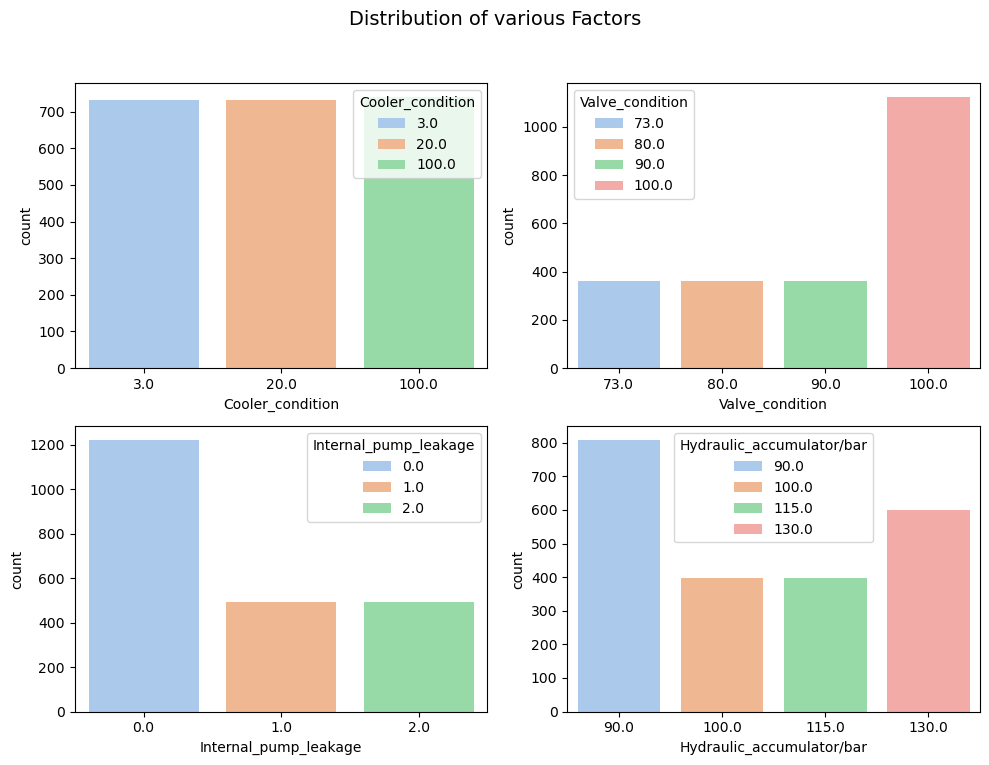

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribution of various Factors', fontsize=14)

sns.countplot(x='Cooler_condition', hue='Cooler_condition', data=df, palette='pastel', ax=axes[0, 0])
sns.countplot(x='Valve_condition', hue='Valve_condition', data=df, palette='pastel', ax=axes[0, 1])
sns.countplot(x='Internal_pump_leakage', hue='Internal_pump_leakage', data=df, palette='pastel', ax=axes[1, 0])
sns.countplot(x='Hydraulic_accumulator/bar', hue='Hydraulic_accumulator/bar', data=df, palette='pastel', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

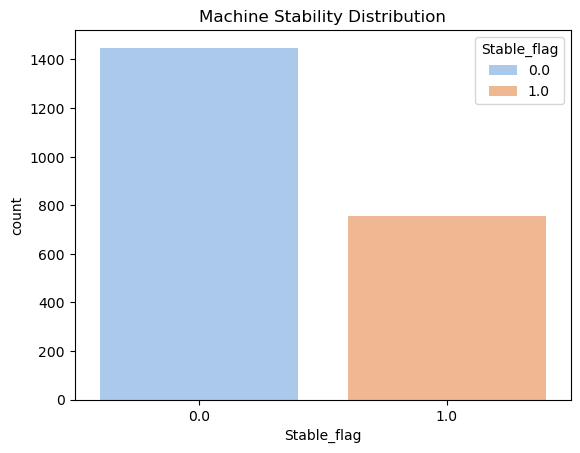

In [33]:
plt.title('Machine Stability Distribution')
sns.countplot(x='Stable_flag', hue='Stable_flag', data=df, palette='pastel')
plt.show()

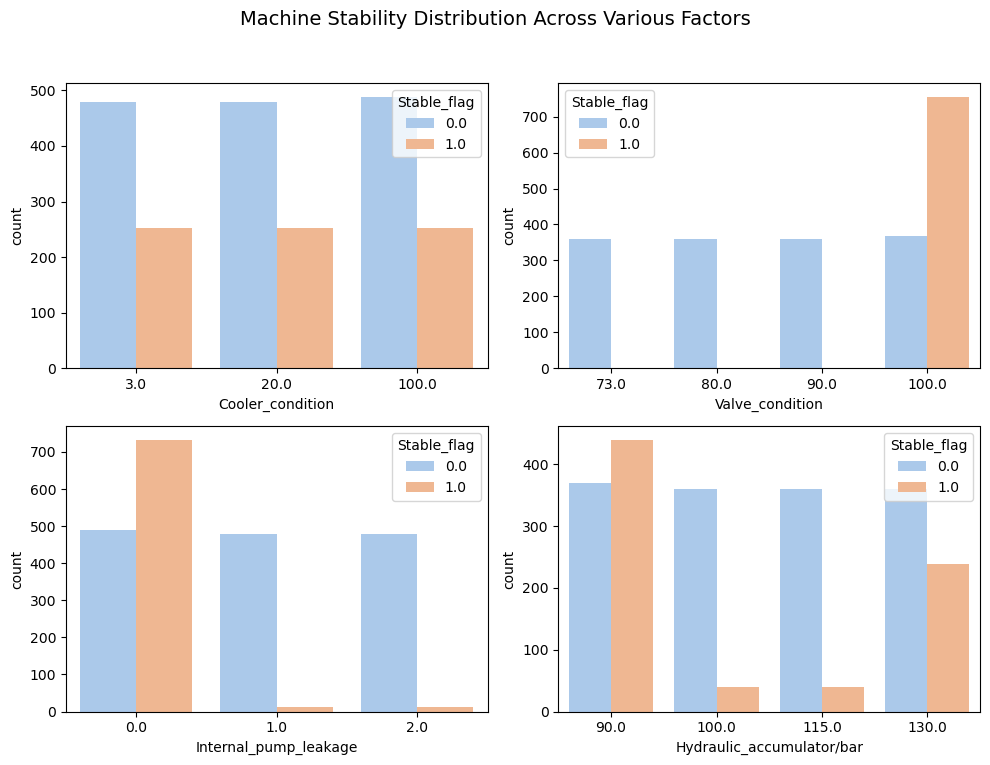

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Machine Stability Distribution Across Various Factors', fontsize=14)

sns.countplot(x='Cooler_condition', hue='Stable_flag', data=df, palette='pastel', ax=axes[0, 0])
sns.countplot(x='Valve_condition', hue='Stable_flag', data=df, palette='pastel', ax=axes[0, 1])
sns.countplot(x='Internal_pump_leakage', hue='Stable_flag', data=df, palette='pastel', ax=axes[1, 0])
sns.countplot(x='Hydraulic_accumulator/bar', hue='Stable_flag', data=df, palette='pastel', ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

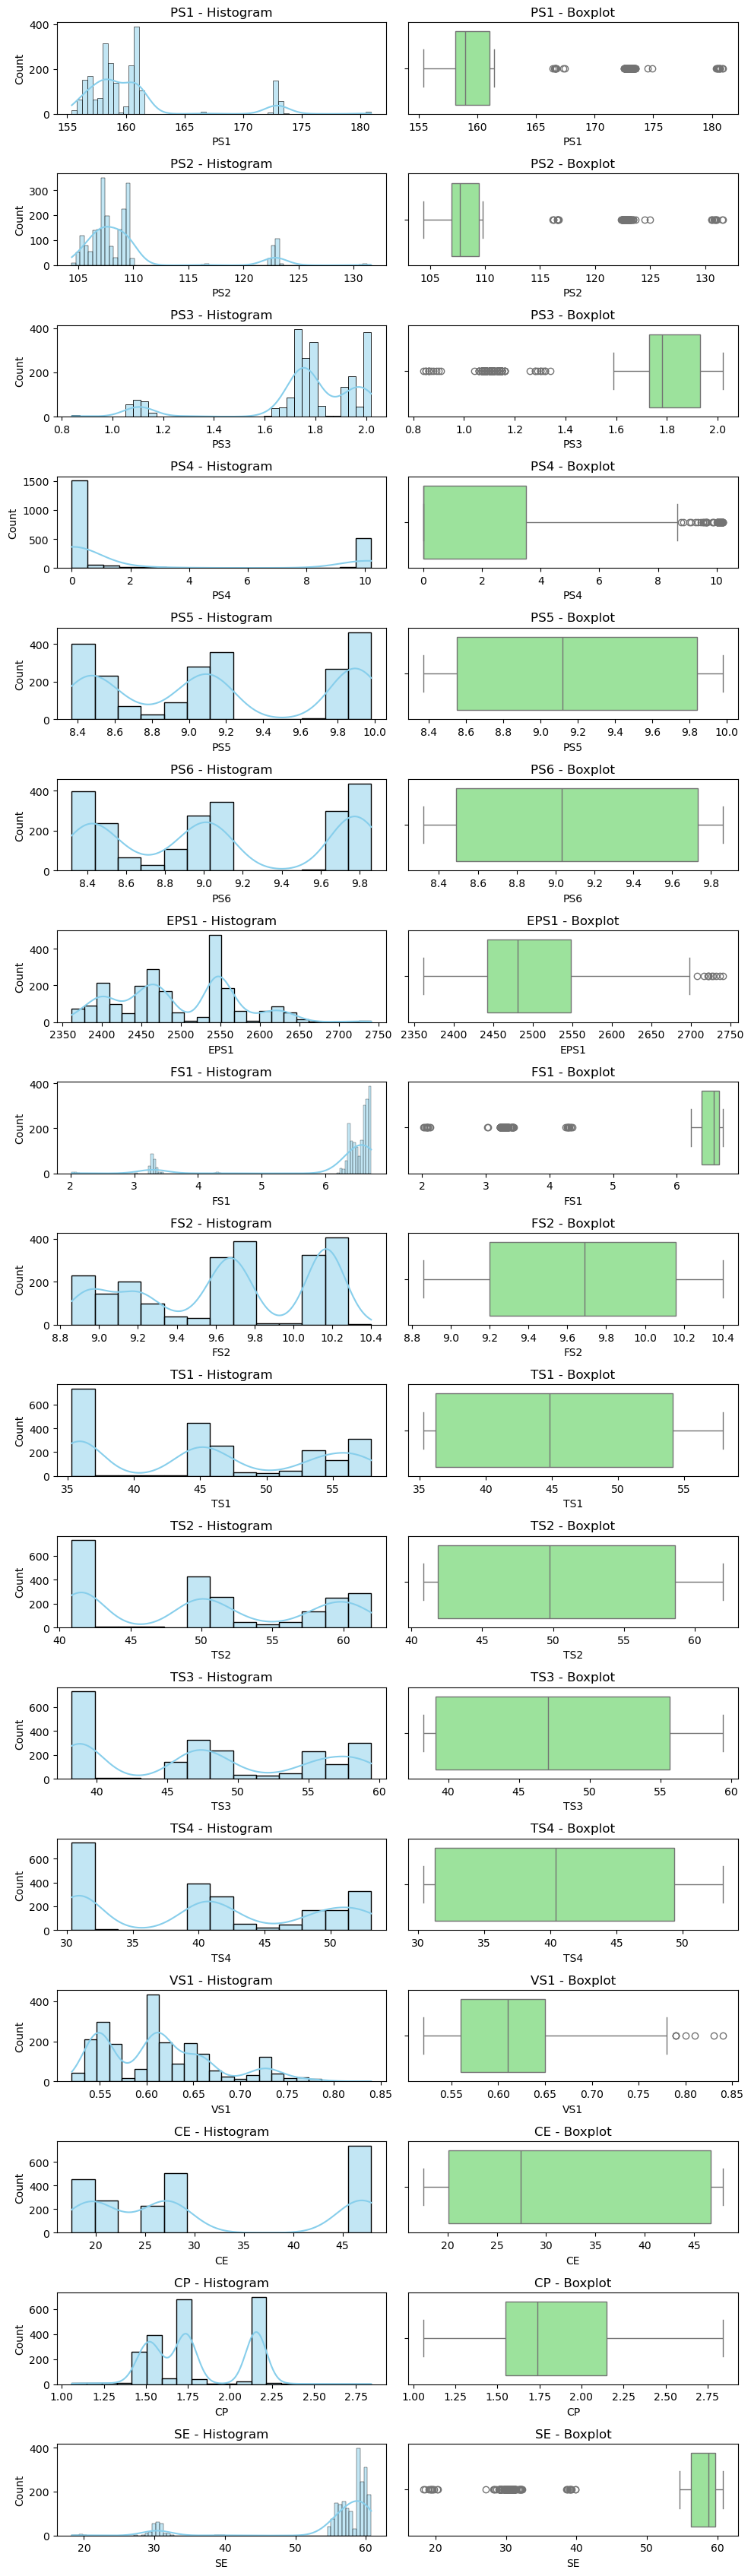

In [35]:
# List of numeric columns to plot
columns = ['PS1', 'PS2', 'PS3', 'PS4', 'PS5', 'PS6', 'EPS1', 'FS1', 'FS2',
           'TS1', 'TS2', 'TS3', 'TS4', 'VS1', 'CE', 'CP', 'SE']

n_cols = 2  # Number of columns in subplot grid
n_rows = len(columns)  # One row per feature (hist + box)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 2 * n_rows))

for i, col in enumerate(columns):
    # Histogram
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'{col} - Histogram')

    # Boxplot (horizontal)
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

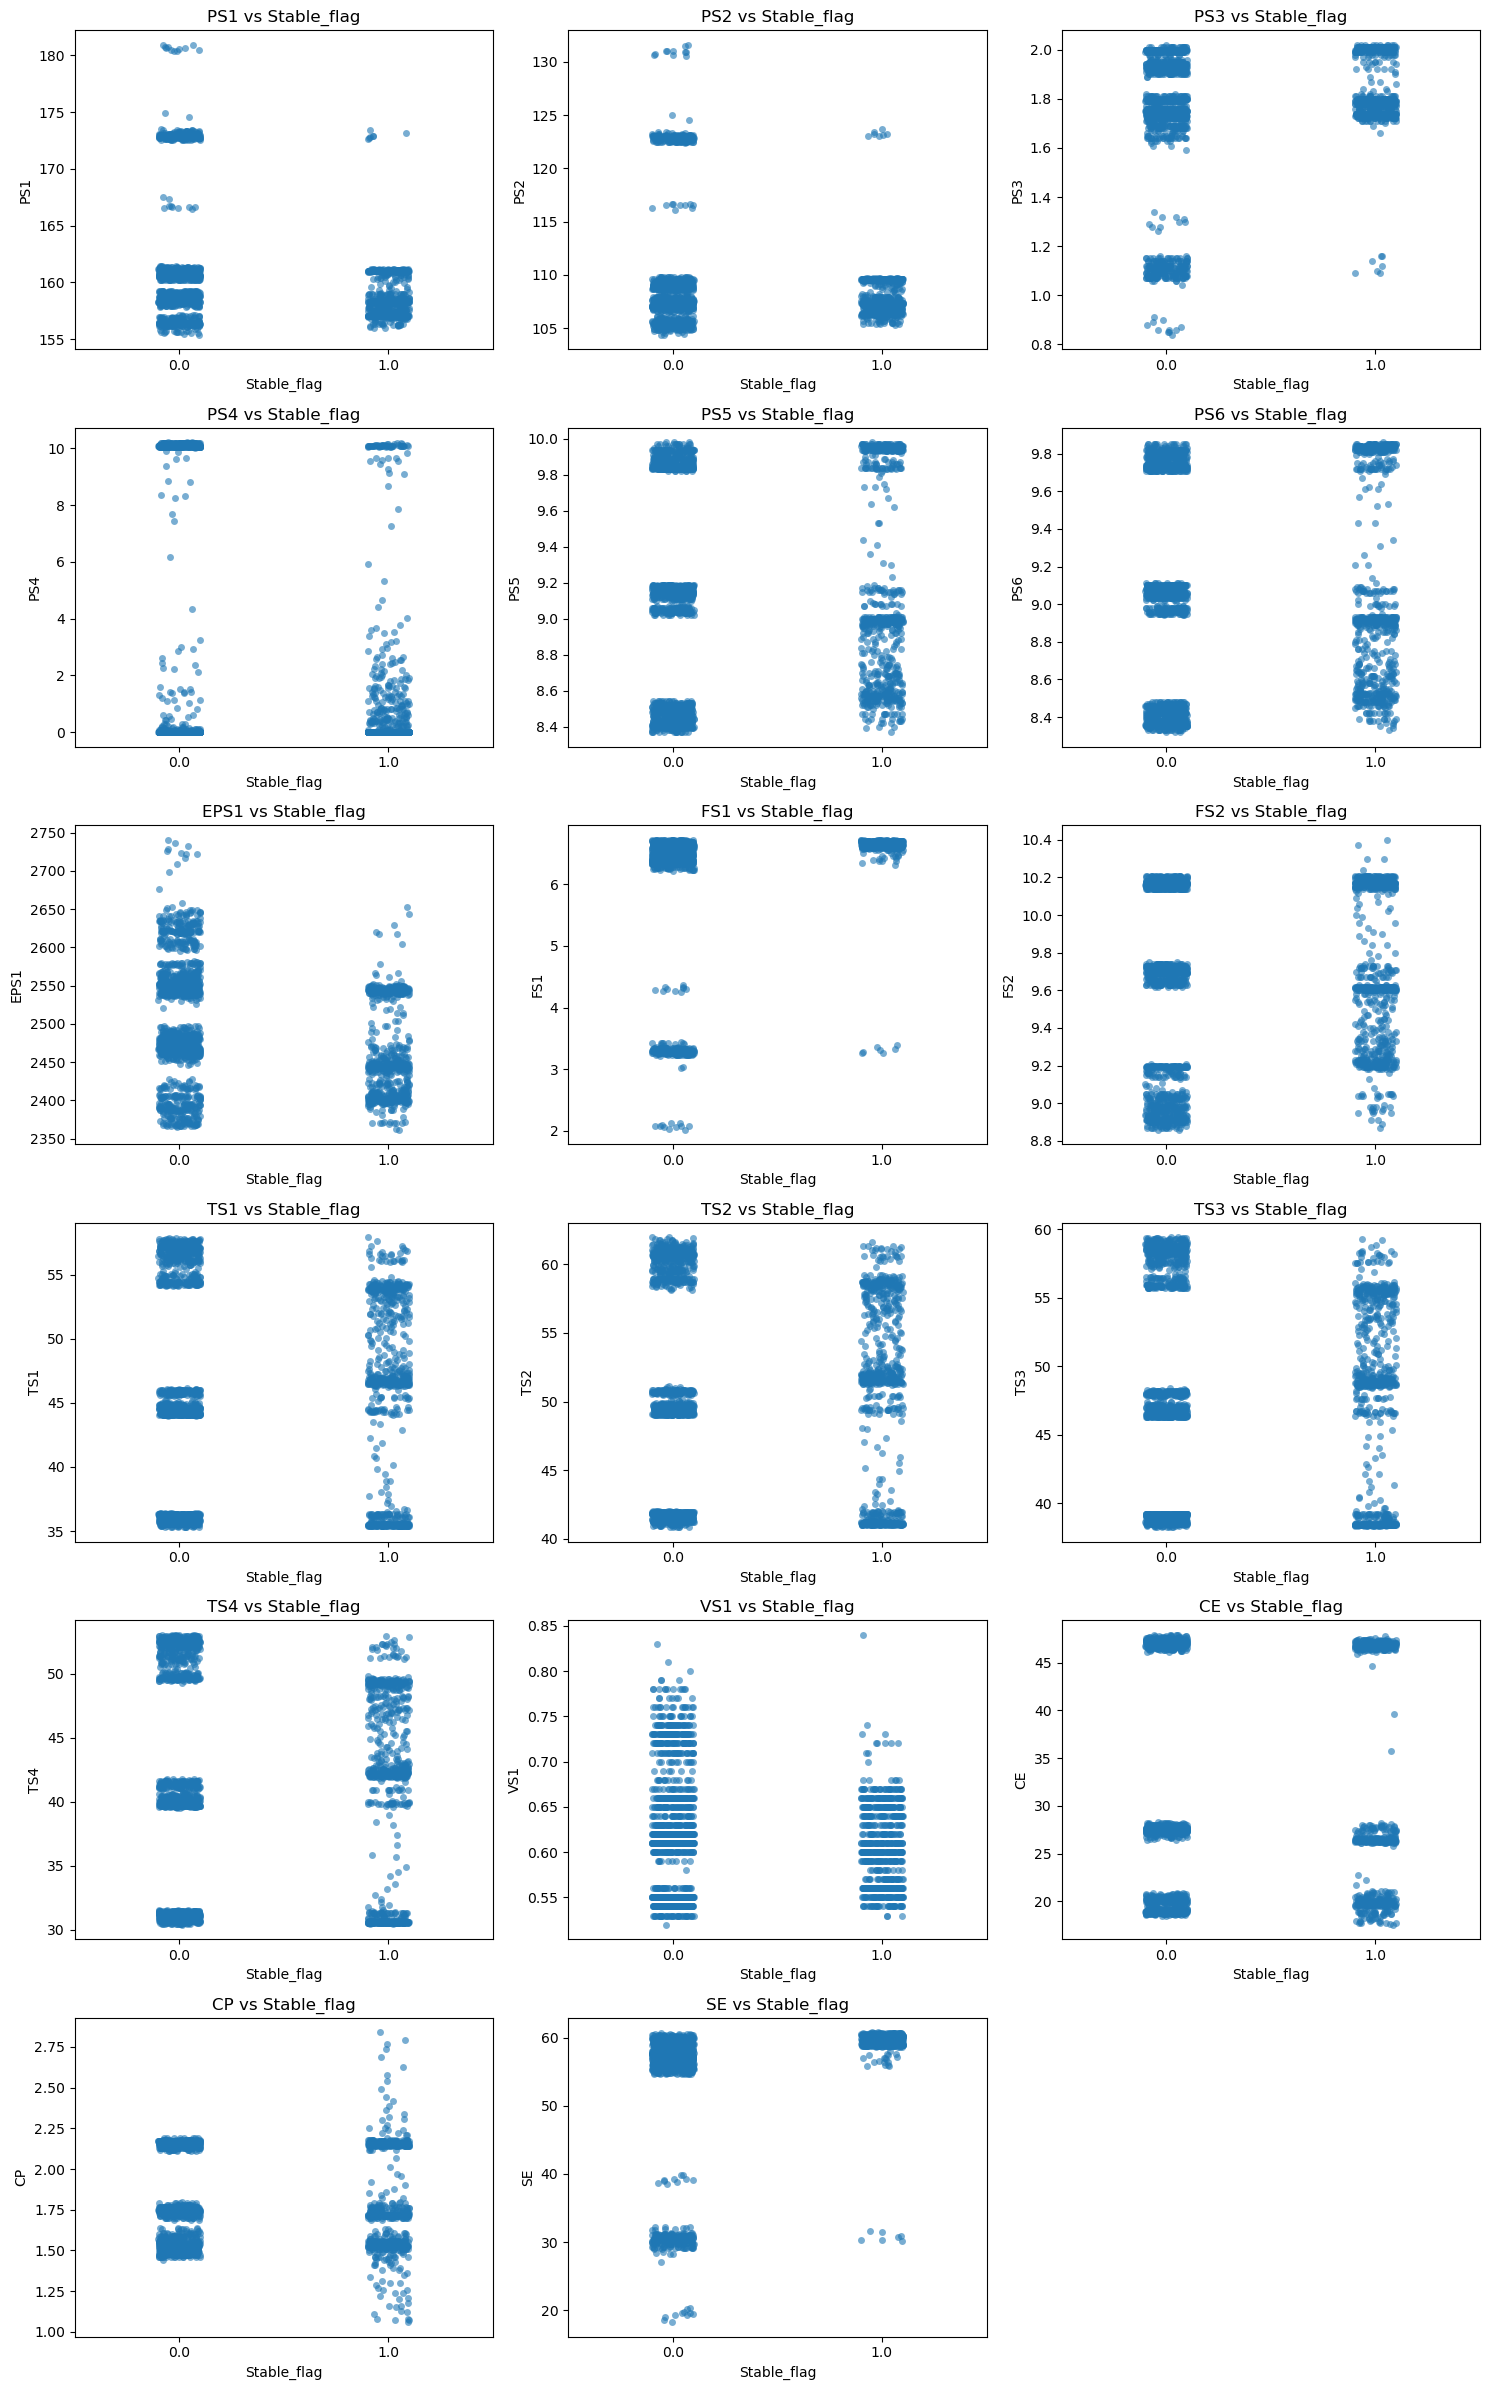

In [36]:
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

# Flatten axes for easy indexing
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.stripplot(x='Stable_flag', y=col, data=df, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{col} vs Stable_flag')

# Turn off extra subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

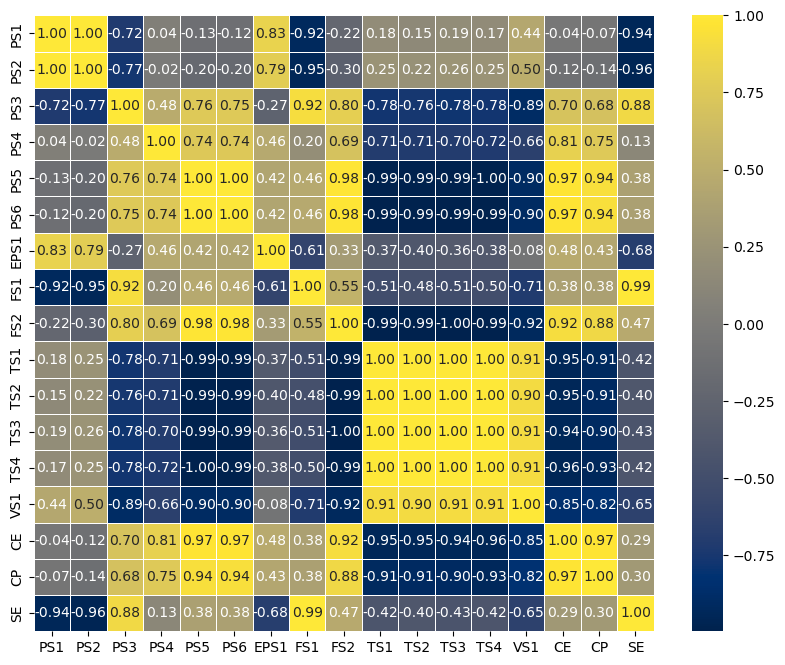

In [37]:
# Generating heatmap (numerical columns only)
corr_matrix=df[columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='cividis',fmt=".2f", linewidths=0.5)
plt.show()

# Data Processing

In [38]:
# Scaling the numerical columns
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [39]:
# Saving the scaling parameters
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [40]:
# Converting the categorical columns to integer type
cols = ['Cooler_condition', 'Valve_condition', 'Internal_pump_leakage', 'Hydraulic_accumulator/bar', 'Stable_flag']
for i in cols:
  df[i] = df[i].astype('int64')

In [41]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_condition,Valve_condition,Internal_pump_leakage,Hydraulic_accumulator/bar,Stable_flag
0,0.039333,0.018097,0.940176,-0.607755,1.174248,1.184389,0.588199,0.495266,1.447939,-1.227109,...,-1.108516,-0.552137,0.717282,0.185362,0.432233,3,100,0,130,1
1,0.024435,-0.005973,0.900463,-0.607755,0.827193,0.820365,0.487549,0.504949,1.670512,-1.094443,...,-0.770493,-0.717868,-0.476042,-1.971104,0.452327,3,100,0,130,1
2,-0.028775,-0.044084,0.860749,-0.607755,0.636313,0.638354,0.330816,0.504949,1.603740,-0.944255,...,-0.627388,-0.552137,-0.784527,-2.510221,0.474653,3,100,0,130,1
3,-0.062830,-0.064143,0.781322,-0.607755,0.480139,0.474543,0.217162,0.504949,1.447939,-0.819099,...,-0.512658,-0.717868,-0.936609,-2.689926,0.502561,3,100,0,130,1
4,-0.103269,-0.090219,0.662181,-0.607755,0.341317,0.328934,0.107571,0.475899,1.314395,-0.703955,...,-0.407797,-0.552137,-0.994503,-2.653985,0.465722,3,100,0,130,1


#### Now, we will use the sensor dataset & the Stable flag (that tells if the system was stable when data was collected — it's a flag for data quality, not a maintenance condition) to predict each conditions/factor from the factors dataset—namely, Cooler_condition, Valve_condition, Internal_pump_leakage, and Hydraulic_accumulator/bar—one by one.
#### Basically theses factors will tell whether we require maintenance in that specific component or not.

✅ Cooler condition:-	Tells if the cooler needs maintenance

✅ Valve condition:-	Tells if the valve needs maintenance

✅ Internal pump leakage:-	Tells if the pump is leaking (needs maintenance)

✅ Hydraulic accumulator condition:-	Tells if the accumulator is working well


## 1st Classification Model
Where we use sensor dataset as independent data and Cooler Condition from factors dataset as dependent/target data.

In [42]:
df_model1 = pd.concat([df[columns], df[['Stable_flag', 'Cooler_condition']]], axis = 1)
df_model1.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,Stable_flag,Cooler_condition
0,0.039333,0.018097,0.940176,-0.607755,1.174248,1.184389,0.588199,0.495266,1.447939,-1.227109,-1.269296,-1.233811,-1.108516,-0.552137,0.717282,0.185362,0.432233,1,3
1,0.024435,-0.005973,0.900463,-0.607755,0.827193,0.820365,0.487549,0.504949,1.670512,-1.094443,-1.194917,-1.165355,-0.770493,-0.717868,-0.476042,-1.971104,0.452327,1,3
2,-0.028775,-0.044084,0.860749,-0.607755,0.636313,0.638354,0.330816,0.504949,1.603740,-0.944255,-1.071854,-1.078108,-0.627388,-0.552137,-0.784527,-2.510221,0.474653,1,3
3,-0.062830,-0.064143,0.781322,-0.607755,0.480139,0.474543,0.217162,0.504949,1.447939,-0.819099,-0.942029,-0.974754,-0.512658,-0.717868,-0.936609,-2.689926,0.502561,1,3
4,-0.103269,-0.090219,0.662181,-0.607755,0.341317,0.328934,0.107571,0.475899,1.314395,-0.703955,-0.816261,-0.852609,-0.407797,-0.552137,-0.994503,-2.653985,0.465722,1,3


In [43]:
# Cooler condition:
# 3: close to total failure
# 20: reduced effifiency
# 100: full efficiency
df_model1['Cooler_condition'].value_counts()

Cooler_condition
100    741
3      732
20     732
Name: count, dtype: int64

In [44]:
le = LabelEncoder()
# Encoding the target column
df_model1['Cooler_condition'] = le.fit_transform(df_model1['Cooler_condition'])
df_model1.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,Stable_flag,Cooler_condition
0,0.039333,0.018097,0.940176,-0.607755,1.174248,1.184389,0.588199,0.495266,1.447939,-1.227109,-1.269296,-1.233811,-1.108516,-0.552137,0.717282,0.185362,0.432233,1,0
1,0.024435,-0.005973,0.900463,-0.607755,0.827193,0.820365,0.487549,0.504949,1.670512,-1.094443,-1.194917,-1.165355,-0.770493,-0.717868,-0.476042,-1.971104,0.452327,1,0
2,-0.028775,-0.044084,0.860749,-0.607755,0.636313,0.638354,0.330816,0.504949,1.603740,-0.944255,-1.071854,-1.078108,-0.627388,-0.552137,-0.784527,-2.510221,0.474653,1,0
3,-0.062830,-0.064143,0.781322,-0.607755,0.480139,0.474543,0.217162,0.504949,1.447939,-0.819099,-0.942029,-0.974754,-0.512658,-0.717868,-0.936609,-2.689926,0.502561,1,0
4,-0.103269,-0.090219,0.662181,-0.607755,0.341317,0.328934,0.107571,0.475899,1.314395,-0.703955,-0.816261,-0.852609,-0.407797,-0.552137,-0.994503,-2.653985,0.465722,1,0


In [45]:
X1 = df_model1.drop('Cooler_condition', axis = 1)
y1 = df_model1['Cooler_condition']

In [46]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [47]:
# Defining our model
lr = LogisticRegression(penalty="l1",C=1.0,max_iter=1000,multi_class='multinomial',solver='saga')
# Defining the cross validation technique
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

In [48]:
n_scores=cross_val_score(lr,X1_train,y1_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(n_scores.mean())

0.9993520458036588


In [49]:
lr.fit(X1_train,y1_train)
lr.score(X1_test,y1_test)

1.0

In [52]:
# save
with open('models/cooler_model.pkl','wb') as f:
    pickle.dump(lr,f)

## 2nd Classification Model
Where we use sensor **dataset** as independent data and Valve Condition from factors dataset as dependent/target data.

In [53]:
df_model2 = pd.concat([df[columns], df[['Stable_flag', 'Valve_condition']]], axis = 1)
df_model2.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,Stable_flag,Valve_condition
0,0.039333,0.018097,0.940176,-0.607755,1.174248,1.184389,0.588199,0.495266,1.447939,-1.227109,-1.269296,-1.233811,-1.108516,-0.552137,0.717282,0.185362,0.432233,1,100
1,0.024435,-0.005973,0.900463,-0.607755,0.827193,0.820365,0.487549,0.504949,1.670512,-1.094443,-1.194917,-1.165355,-0.770493,-0.717868,-0.476042,-1.971104,0.452327,1,100
2,-0.028775,-0.044084,0.860749,-0.607755,0.636313,0.638354,0.330816,0.504949,1.603740,-0.944255,-1.071854,-1.078108,-0.627388,-0.552137,-0.784527,-2.510221,0.474653,1,100
3,-0.062830,-0.064143,0.781322,-0.607755,0.480139,0.474543,0.217162,0.504949,1.447939,-0.819099,-0.942029,-0.974754,-0.512658,-0.717868,-0.936609,-2.689926,0.502561,1,100
4,-0.103269,-0.090219,0.662181,-0.607755,0.341317,0.328934,0.107571,0.475899,1.314395,-0.703955,-0.816261,-0.852609,-0.407797,-0.552137,-0.994503,-2.653985,0.465722,1,100


In [54]:
# Valve condition:
# 100: optimal switching behavior
# 90: small lag
# 80: severe lag
# 73: close to total failure
df_model2['Valve_condition'].value_counts()

Valve_condition
100    1125
73      360
80      360
90      360
Name: count, dtype: int64

In [55]:
# Encoding the target column
df_model2['Valve_condition'] = le.fit_transform(df_model2['Valve_condition'])
df_model2.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,Stable_flag,Valve_condition
0,0.039333,0.018097,0.940176,-0.607755,1.174248,1.184389,0.588199,0.495266,1.447939,-1.227109,-1.269296,-1.233811,-1.108516,-0.552137,0.717282,0.185362,0.432233,1,3
1,0.024435,-0.005973,0.900463,-0.607755,0.827193,0.820365,0.487549,0.504949,1.670512,-1.094443,-1.194917,-1.165355,-0.770493,-0.717868,-0.476042,-1.971104,0.452327,1,3
2,-0.028775,-0.044084,0.860749,-0.607755,0.636313,0.638354,0.330816,0.504949,1.603740,-0.944255,-1.071854,-1.078108,-0.627388,-0.552137,-0.784527,-2.510221,0.474653,1,3
3,-0.062830,-0.064143,0.781322,-0.607755,0.480139,0.474543,0.217162,0.504949,1.447939,-0.819099,-0.942029,-0.974754,-0.512658,-0.717868,-0.936609,-2.689926,0.502561,1,3
4,-0.103269,-0.090219,0.662181,-0.607755,0.341317,0.328934,0.107571,0.475899,1.314395,-0.703955,-0.816261,-0.852609,-0.407797,-0.552137,-0.994503,-2.653985,0.465722,1,3


In [56]:
X2 = df_model2.drop('Valve_condition', axis = 1)
y2 = df_model2['Valve_condition']

In [57]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [58]:
n_scores=cross_val_score(lr,X2_train,y2_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(n_scores.mean())

0.9343304007820136


In [59]:
lr.fit(X2_train,y2_train)
lr.score(X2_test,y2_test)

0.9380664652567976

In [60]:
# save
with open('models/valve_model.pkl','wb') as f:
    pickle.dump(lr,f)

## 3rd Classification Model
Where we use sensor dataset as independent data and Internal pump leakage from factors dataset as dependent/target data.

In [61]:
df_model3 = pd.concat([df[columns], df[['Stable_flag', 'Internal_pump_leakage']]], axis = 1)
df_model3.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,Stable_flag,Internal_pump_leakage
0,0.039333,0.018097,0.940176,-0.607755,1.174248,1.184389,0.588199,0.495266,1.447939,-1.227109,-1.269296,-1.233811,-1.108516,-0.552137,0.717282,0.185362,0.432233,1,0
1,0.024435,-0.005973,0.900463,-0.607755,0.827193,0.820365,0.487549,0.504949,1.670512,-1.094443,-1.194917,-1.165355,-0.770493,-0.717868,-0.476042,-1.971104,0.452327,1,0
2,-0.028775,-0.044084,0.860749,-0.607755,0.636313,0.638354,0.330816,0.504949,1.603740,-0.944255,-1.071854,-1.078108,-0.627388,-0.552137,-0.784527,-2.510221,0.474653,1,0
3,-0.062830,-0.064143,0.781322,-0.607755,0.480139,0.474543,0.217162,0.504949,1.447939,-0.819099,-0.942029,-0.974754,-0.512658,-0.717868,-0.936609,-2.689926,0.502561,1,0
4,-0.103269,-0.090219,0.662181,-0.607755,0.341317,0.328934,0.107571,0.475899,1.314395,-0.703955,-0.816261,-0.852609,-0.407797,-0.552137,-0.994503,-2.653985,0.465722,1,0


In [62]:
# Internal pump leakage:
# 0: no leakage
# 1: weak leakage
# 2: severe leakage
df_model3['Internal_pump_leakage'].value_counts()

Internal_pump_leakage
0    1221
2     492
1     492
Name: count, dtype: int64

In [63]:
X3 = df_model3.drop('Internal_pump_leakage', axis = 1)
y3 = df_model3['Internal_pump_leakage']

In [64]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [65]:
n_scores=cross_val_score(lr,X3_train,y3_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(n_scores.mean())

0.9926574500768051


In [66]:
lr.fit(X3_train,y3_train)
lr.score(X3_test,y3_test)

0.9969788519637462

In [67]:
# save
with open('models/pump_model.pkl','wb') as f:
    pickle.dump(lr,f)

### 4th Classification Model
Where we use sensor dataset as independent data and Hydraulic accumulator/bar from factors dataset as dependent/target data.

In [68]:
df_model4 = pd.concat([df[columns], df[['Stable_flag', 'Hydraulic_accumulator/bar']]], axis = 1)
df_model4.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,Stable_flag,Hydraulic_accumulator/bar
0,0.039333,0.018097,0.940176,-0.607755,1.174248,1.184389,0.588199,0.495266,1.447939,-1.227109,-1.269296,-1.233811,-1.108516,-0.552137,0.717282,0.185362,0.432233,1,130
1,0.024435,-0.005973,0.900463,-0.607755,0.827193,0.820365,0.487549,0.504949,1.670512,-1.094443,-1.194917,-1.165355,-0.770493,-0.717868,-0.476042,-1.971104,0.452327,1,130
2,-0.028775,-0.044084,0.860749,-0.607755,0.636313,0.638354,0.330816,0.504949,1.603740,-0.944255,-1.071854,-1.078108,-0.627388,-0.552137,-0.784527,-2.510221,0.474653,1,130
3,-0.062830,-0.064143,0.781322,-0.607755,0.480139,0.474543,0.217162,0.504949,1.447939,-0.819099,-0.942029,-0.974754,-0.512658,-0.717868,-0.936609,-2.689926,0.502561,1,130
4,-0.103269,-0.090219,0.662181,-0.607755,0.341317,0.328934,0.107571,0.475899,1.314395,-0.703955,-0.816261,-0.852609,-0.407797,-0.552137,-0.994503,-2.653985,0.465722,1,130


In [69]:
# Hydraulic accumulator / bar:
# 130: optimal pressure
# 115: slightly reduced pressure
# 100: severely reduced pressure
# 90: close to total failure
df_model4['Hydraulic_accumulator/bar'].value_counts()

Hydraulic_accumulator/bar
90     808
130    599
115    399
100    399
Name: count, dtype: int64

In [70]:
# Encoding the target column
df_model4['Hydraulic_accumulator/bar'] = le.fit_transform(df_model4['Hydraulic_accumulator/bar'])
df_model4.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,Stable_flag,Hydraulic_accumulator/bar
0,0.039333,0.018097,0.940176,-0.607755,1.174248,1.184389,0.588199,0.495266,1.447939,-1.227109,-1.269296,-1.233811,-1.108516,-0.552137,0.717282,0.185362,0.432233,1,3
1,0.024435,-0.005973,0.900463,-0.607755,0.827193,0.820365,0.487549,0.504949,1.670512,-1.094443,-1.194917,-1.165355,-0.770493,-0.717868,-0.476042,-1.971104,0.452327,1,3
2,-0.028775,-0.044084,0.860749,-0.607755,0.636313,0.638354,0.330816,0.504949,1.603740,-0.944255,-1.071854,-1.078108,-0.627388,-0.552137,-0.784527,-2.510221,0.474653,1,3
3,-0.062830,-0.064143,0.781322,-0.607755,0.480139,0.474543,0.217162,0.504949,1.447939,-0.819099,-0.942029,-0.974754,-0.512658,-0.717868,-0.936609,-2.689926,0.502561,1,3
4,-0.103269,-0.090219,0.662181,-0.607755,0.341317,0.328934,0.107571,0.475899,1.314395,-0.703955,-0.816261,-0.852609,-0.407797,-0.552137,-0.994503,-2.653985,0.465722,1,3


In [71]:
X4 = df_model4.drop('Hydraulic_accumulator/bar', axis = 1)
y4 = df_model4['Hydraulic_accumulator/bar']

In [72]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=1)

In [73]:
n_scores=cross_val_score(lr,X4_train,y4_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(n_scores.mean())

0.7252129590839268


In [74]:
lr.fit(X4_train,y4_train)
lr.score(X4_test,y4_test)

0.6978851963746223

Logistic Regression performed poorly for "Hydraulic_accumulator/bar" let's try other models

In [75]:
# Defining our model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Defining the cross validation technique
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

In [76]:
n_scores=cross_val_score(rf,X4_train,y4_train,scoring='accuracy',cv=cv,n_jobs=-1)
print(n_scores.mean())

0.9773383605641669


In [77]:
rf.fit(X4_train,y4_train)
rf.score(X4_test,y4_test)

0.9788519637462235

In [78]:
# save
with open('models/accumulator_model.pkl','wb') as f:
    pickle.dump(rf,f)